출처 : pytorch 튜트리얼

In [1]:
%matplotlib inline

In [2]:
import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

In [3]:
a = torch.linspace(0., 2. * math.pi, steps = 25, requires_grad = True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


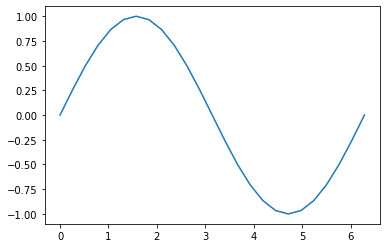

In [4]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

In [5]:
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


In [6]:
c = 2 * b
print(c)

d = c + 1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


In [7]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


In [8]:
print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

d:
((<MulBackward0 object at 0x7f05c63396d0>, 0), (None, 0))
((<SinBackward0 object at 0x7f05c63397d0>, 0), (None, 0))
((<AccumulateGrad object at 0x7f05c63396d0>, 0),)
()

c:

b:

a:
None


tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


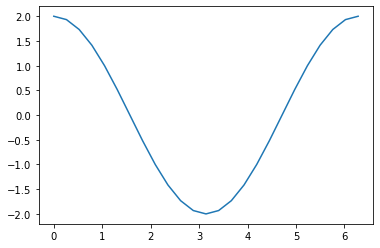

In [9]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

In [11]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.layer1 = torch.nn.Linear(1000, 100)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(100, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()

In [12]:
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad)

tensor([ 0.0894,  0.0997,  0.0601, -0.0103, -0.0314,  0.0167,  0.0735, -0.0840,
         0.0739,  0.0132], grad_fn=<SliceBackward0>)
None


In [13]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
prediction = model(some_input)

loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(189.5017, grad_fn=<SumBackward0>)


In [16]:
loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([ 0.0894,  0.0997,  0.0601, -0.0103, -0.0314,  0.0167,  0.0735, -0.0840,
         0.0739,  0.0132], grad_fn=<SliceBackward0>)
tensor([ 1.9377,  7.5440,  7.6385,  5.4884,  3.7974,  3.7995,  8.3092,  1.2949,
        -0.5109,  1.4444])


In [18]:
optimizer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([ 0.0875,  0.0921,  0.0525, -0.0158, -0.0352,  0.0129,  0.0651, -0.0853,
         0.0744,  0.0118], grad_fn=<SliceBackward0>)
tensor([ 1.9377,  7.5440,  7.6385,  5.4884,  3.7974,  3.7995,  8.3092,  1.2949,
        -0.5109,  1.4444])


In [19]:
print(model.layer2.weight.grad[0][0:10])

for i in range(0, 5):
    prediction = model(some_input)
    loss = (ideal_output - prediction).pow(2).sum()
    loss.backward()

print(model.layer2.weight[0][0:10])
optimizer.zero_grad()
print(model.layer2.weight.grad[0][0:10])

tensor([ 1.9377,  7.5440,  7.6385,  5.4884,  3.7974,  3.7995,  8.3092,  1.2949,
        -0.5109,  1.4444])
tensor([ 0.0875,  0.0921,  0.0525, -0.0158, -0.0352,  0.0129,  0.0651, -0.0853,
         0.0744,  0.0118], grad_fn=<SliceBackward0>)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [20]:
a = torch.ones(2, 3, requires_grad = True)
print(a)

b1 = 2 * a
print(b1)

a.requires_grad = False
b2 = 2 * a
print(b2)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])


In [21]:
a = torch.ones(2, 3, requires_grad = True) * 2
b = torch.ones(2, 3, requires_grad = True) * 3

c1 = a + b
print(c1)

with torch.no_grad():
    c2 = a + b

print(c2)

c3 = a * b
print(c3)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[6., 6., 6.],
        [6., 6., 6.]], grad_fn=<MulBackward0>)


In [22]:
def add_tensor1(x, y):
    return x + y

@torch.no_grad()
def add_tensor2(x, y):
    return x + y

a = torch.ones(2, 3, requires_grad = True) * 2
b = torch.ones(2, 3, requires_grad = True) * 3

c1 = add_tensor1(a, b)
print(c1)

c2 = add_tensor2(a, b)
print(c2)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [23]:
x = torch.rand(5, requires_grad = True)
y = x.detach()

print(x)
print(y)

tensor([0.9127, 0.3154, 0.5689, 0.8352, 0.9435], requires_grad=True)
tensor([0.9127, 0.3154, 0.5689, 0.8352, 0.9435])


In [26]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
torch.sin_(a)

RuntimeError: ignored

In [27]:
device = torch.device('cpu')
run_on_gpr = False
if torch.cuda.is_available():
    device = torch.device('cuda')
    run_on_gpu = True

x = torch.randn(2, 3, requires_grad = True)
y = torch.randn(2, 3, requires_grad = True)
z = torch.randn(2, 3, requires_grad = True)

with torch.autograd.profiler.profile(use_cuda = run_on_gpu) as prf:
    for _ in range(1000):
        z = (z / x) * y

print(prf.key_averages().table(sort_by = 'self_cpu_time_total'))

---------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                       Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg    # of Calls  
---------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
            cudaEventCreate        99.69%       11.746s        99.69%       11.746s       2.937ms       0.000us         0.00%       0.000us       0.000us          4000  
                  aten::div         0.19%      22.674ms        99.88%       11.769s      11.769ms      10.328ms        50.77%      10.328ms      10.328us          1000  
                  aten::mul         0.07%       8.688ms         0.09%      10.131ms      10.131us      10.015ms        49.23%      10.015ms      10.0

In [28]:
x = torch.randn(3, requires_grad = True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-1052.2142,  -528.0756,  -770.7518], grad_fn=<MulBackward0>)


In [30]:
v = torch.tensor([0.1, 1.0, 0.0001])
y.backward(v)
print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [31]:
def exp_adder(x, y):
    return 2 * x.exp() + 3 * y

inputs = (torch.rand(1), torch.rand(1))
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.2034]), tensor([0.1183]))


(tensor([[2.4512]]), tensor([[3.]]))

In [32]:
def do_some_doubling(x):
    y = x * 2
    while y.data.norm() < 1000:
        y = y * 2
    return y

inputs = torch.randn(3)
my_gradients = torch.tensor([0.1, 1.0, 0.0001])
torch.autograd.functional.vjp(do_some_doubling, inputs, v=my_gradients)

(tensor([  208.4940, -1478.2087,    93.4120]),
 tensor([1.0240e+02, 1.0240e+03, 1.0240e-01]))